# Question 2
## analyze_visits.py

In [1]:
# step 1
import pandas as pd
import numpy as np

df = pd.read_csv('ms_data.csv')
df['visit_date'] = pd.to_datetime(df['visit_date'])
df.sort_values(by=['patient_id','visit_date'])
print(df)

      patient_id visit_date    age education_level  walking_speed
0          P0001 2020-01-07  53.07        Graduate           4.03
1          P0001 2020-04-19  53.36        Graduate           4.97
2          P0001 2020-07-09  53.58        Graduate           4.15
3          P0001 2020-09-26  53.79        Graduate           4.34
4          P0001 2020-12-22  54.03        Graduate           4.47
...          ...        ...    ...             ...            ...
15382      P1000 2022-05-23  75.30    Some College           2.53
15383      P1000 2022-08-29  75.57    Some College           3.60
15384      P1000 2023-03-02  76.08    Some College           3.03
15385      P1000 2023-06-12  76.36    Some College           2.66
15386      P1000 2023-09-23  76.64    Some College           2.92

[15387 rows x 5 columns]


In [2]:
# step 2
# dictionary for each patient_id value to get a random insurance type
insurance = pd.read_table('insurance.lst')
insurance = pd.Series(insurance['insurance_type'])
id_list = np.unique(df['patient_id'])
insurance_type = {}
for i in range(len(id_list)):
    insurance_type[id_list[i]] = insurance[np.random.randint(3)]

# insert values into insurance column based on dictionary
for i in range(len(df)):
    df.loc[i, 'insurance'] = insurance_type[df.loc[i, 'patient_id']]
    # generate a random cost for each visit based on insurance type
    # average of basic coverage is 1000, premium is 750, platinum is 500
    # actual cost can range from 80-120% of average, and each visit is generated independently
    if df.loc[i, 'insurance']=='Basic': df.loc[i, 'visit_cost'] = round(1000*np.random.uniform(low=0.8, high=1.2), 2)
    if df.loc[i, 'insurance']=='Premium': df.loc[i, 'visit_cost'] = round(750*np.random.uniform(low=0.8, high=1.2), 2)
    if df.loc[i, 'insurance']=='Platinum': df.loc[i, 'visit_cost'] = round(500*np.random.uniform(low=0.8, high=1.2), 2)
print(df)

      patient_id visit_date    age education_level  walking_speed insurance  \
0          P0001 2020-01-07  53.07        Graduate           4.03   Premium   
1          P0001 2020-04-19  53.36        Graduate           4.97   Premium   
2          P0001 2020-07-09  53.58        Graduate           4.15   Premium   
3          P0001 2020-09-26  53.79        Graduate           4.34   Premium   
4          P0001 2020-12-22  54.03        Graduate           4.47   Premium   
...          ...        ...    ...             ...            ...       ...   
15382      P1000 2022-05-23  75.30    Some College           2.53  Platinum   
15383      P1000 2022-08-29  75.57    Some College           3.60  Platinum   
15384      P1000 2023-03-02  76.08    Some College           3.03  Platinum   
15385      P1000 2023-06-12  76.36    Some College           2.66  Platinum   
15386      P1000 2023-09-23  76.64    Some College           2.92  Platinum   

       visit_cost  
0          830.63  
1          

In [3]:
# step 3
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

print('Mean Walking Speed by Education Level\n', df.groupby('education_level')['walking_speed'].mean(), '\n')
print('Mean Visit Cost by Insurance Type\n', df.groupby('insurance')['visit_cost'].mean(), '\n')

print("=== Linear Regression for Walking Speed by Age ===")
X_with_const = sm.add_constant(df['age'])
y = df['walking_speed']
model = OLS(y, X_with_const)
results = model.fit()
print(results.summary().tables[1])

Mean Walking Speed by Education Level
 education_level
Bachelors       4.018453
Graduate        4.476606
High School     3.236911
Some College    3.606970
Name: walking_speed, dtype: float64 

Mean Visit Cost by Insurance Type
 insurance
Basic       1001.371174
Platinum     500.027385
Premium      749.417626
Name: visit_cost, dtype: float64 

=== Linear Regression for Walking Speed by Age ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4525      0.014    381.430      0.000       5.424       5.480
age           -0.0309      0.000   -118.965      0.000      -0.031      -0.030


# Question 3
## stats_analysis.py

In [4]:
# part 1 - analyze walking speed
df.loc[df['education_level']=='High School', 'education_num'] = 0
df.loc[df['education_level']=='Some College', 'education_num'] = 1
df.loc[df['education_level']=='Bachelors', 'education_num'] = 2
df.loc[df['education_level']=='Graduate', 'education_num'] = 3
print("=== Linear Regression for Walking Speed by Age and Education ===")
X_with_const = sm.add_constant(df[['age', 'education_num']])
y = df['walking_speed']
model = OLS(y, X_with_const)
results = model.fit()
print(results.summary().tables[1])

=== Linear Regression for Walking Speed by Age and Education ===
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8110      0.010    504.791      0.000       4.792       4.830
age              -0.0303      0.000   -192.062      0.000      -0.031      -0.030
education_num     0.4024      0.002    162.470      0.000       0.398       0.407


Overall visit cost statistics: count    15387.000000
mean       754.287347
std        224.613824
min        400.010000
25%        552.665000
50%        754.730000
75%        911.940000
max       1199.990000
Name: visit_cost, dtype: float64 

Basic insurance visit cost statistics:
 count    5298.000000
mean     1001.371174
std       115.655662
min       800.510000
25%       902.970000
50%      1003.190000
75%      1101.520000
max      1199.990000
Name: visit_cost, dtype: float64 

Premium insurance visit cost statistics:
 count    5037.000000
mean      749.417626
std        87.029676
min       600.030000
25%       674.090000
50%       746.840000
75%       824.860000
max       899.980000
Name: visit_cost, dtype: float64 

Platinum insurance visit cost statistics:
 count    5052.000000
mean      500.027385
std        58.151551
min       400.010000
25%       449.525000
50%       500.210000
75%       550.482500
max       599.870000
Name: visit_cost, dtype: float64 



Text(0.5, 1.0, 'BMI Distribution by Age Group')

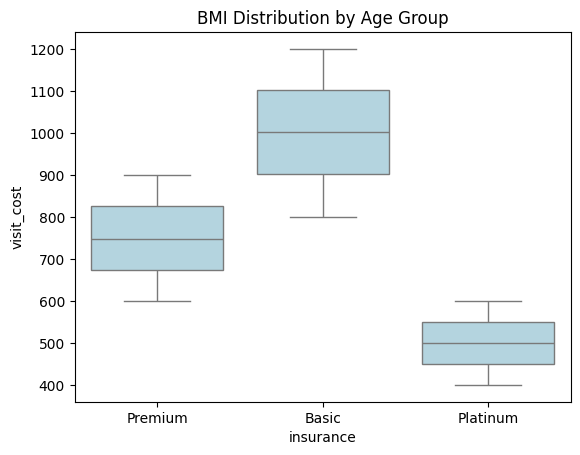

In [ ]:
import seaborn as sns
# part 2 - analyze costs

print('Overall visit cost statistics:\n', df['visit_cost'].describe(), '\n')
print('Basic insurance visit cost statistics:\n', df.loc[df['insurance']=='Basic', 'visit_cost'].describe(), '\n')
print('Premium insurance visit cost statistics:\n', df.loc[df['insurance']=='Premium', 'visit_cost'].describe(), '\n')
print('Platinum insurance visit cost statistics:\n', df.loc[df['insurance']=='Platinum', 'visit_cost'].describe(), '\n')

ax = sns.boxplot(data=df, x='insurance', y='visit_cost', color='lightblue')
ax.set_title('BMI Distribution by Age Group')